dog
dict_keys(['gallina', 'ragno', 'gatto', 'farfalla', 'mucca', 'cavallo', 'cane', 'pecora', 'scoiattolo', 'elefante'])


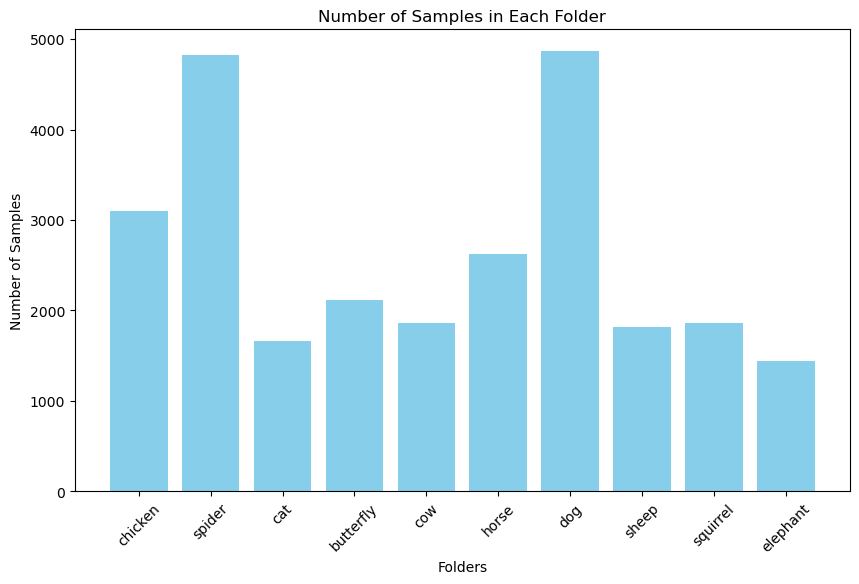

In [1]:
import os

import matplotlib.pyplot as plt

# Path to the folder containing the subfolders
folder_path = "archive/raw-img/"

# Get the list of subfolders
subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]

# Count the number of samples in each subfolder
sample_counts = {os.path.basename(subfolder): len(os.listdir(subfolder)) for subfolder in subfolders}

# Plot the histogram
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo", "ragno": "spider"}
print(translate['cane'])
# Translate the keys in sample_counts to English
print(sample_counts.keys())
sample_counts_translated = {translate[key]: value for key, value in sample_counts.items()}
plt.figure(figsize=(10, 6))
plt.bar(sample_counts_translated.keys(), sample_counts_translated.values(), color='skyblue')
plt.xlabel('Folders')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Each Folder')
plt.xticks(rotation=45)
plt.show()

In [3]:
import os

# Function to rename images in a subfolder
def rename_images(subfolder, name):
    for idx, filename in enumerate(os.listdir(subfolder)):
        file_path = os.path.join(subfolder, filename)
        if os.path.isfile(file_path):
            filetype = filename.split('.')[-1]
            new_filename = f"{name}_{idx}.{filetype}"
            new_file_path = os.path.join(subfolder, new_filename)
            os.rename(file_path, new_file_path)

'''# Rename images in each subfolder
for subfolder in subfolders:
    folder_name = os.path.basename(subfolder)
    translated_name = translate[folder_name]
    rename_images(subfolder, translated_name)'''

In [4]:
# Create the main folder
data_folder = os.path.join(folder_path, 'data')
os.makedirs(data_folder, exist_ok=True)

# Create subfolders
subfolders = ['Training', 'Validation', 'Test']
for subfolder in subfolders:
    os.makedirs(os.path.join(data_folder, subfolder), exist_ok=True)

In [10]:
import shutil


dataPath = 'data/'
tempPath = dataPath + 'temporary/'
filePath = 'archive/raw-img/'

# Create the temporary folder
os.makedirs(tempPath, exist_ok=True)

# Copy images to the temporary folder
for folder in os.listdir(filePath):
    folderPath = os.path.join(filePath, folder)
    if os.path.isdir(folderPath):  # Check if it is a directory
        for img in os.listdir(folderPath):
            imgPath = os.path.join(folderPath, img)
            shutil.copy(imgPath, tempPath)


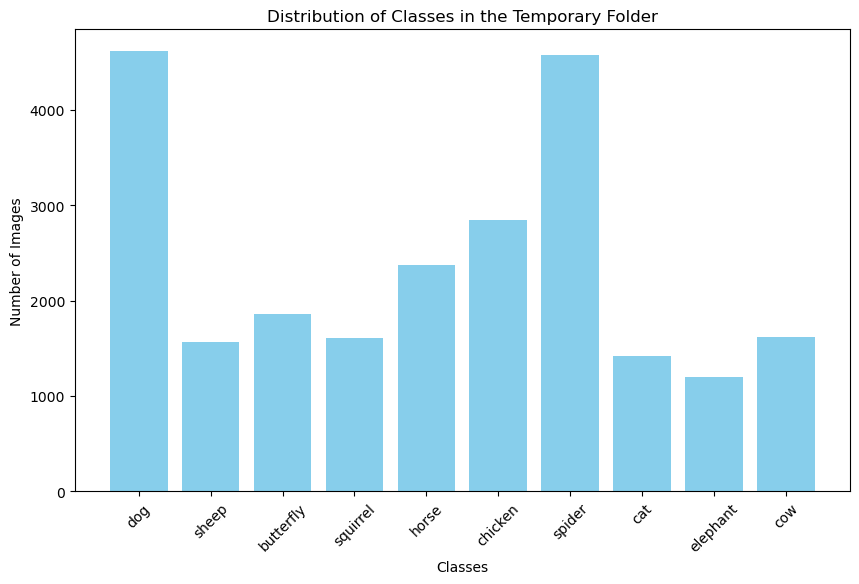

In [13]:
# Count the number of images in each class in the temporary folder
class_counts = {}
for img in os.listdir(tempPath):
    class_name = img.split('_')[0]
    if class_name in class_counts:
        class_counts[class_name] += 1
    else:
        class_counts[class_name] = 1

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in the Temporary Folder')
plt.xticks(rotation=45)
plt.show()

In [12]:
import random
import shutil

# Create the test folder if it doesn't exist
test_folder = os.path.join(dataPath, 'Test')
os.makedirs(test_folder, exist_ok=True)

# Take 250 random samples from each class and move them to the test folder
for class_name in class_counts.keys():
    class_images = [img for img in os.listdir(tempPath) if img.startswith(class_name)]
    random_samples = random.sample(class_images, min(250, len(class_images)))
    
    for img in random_samples:
        src_path = os.path.join(tempPath, img)
        dst_path = os.path.join(test_folder, img)
        shutil.move(src_path, dst_path)

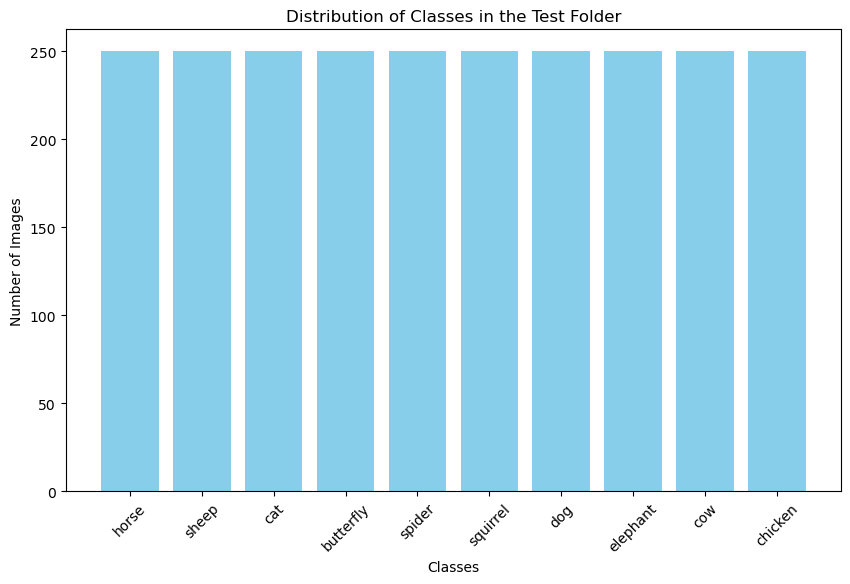

In [14]:
# Count the number of images in each class in the test folder
test_class_counts = {}
for img in os.listdir(test_folder):
    class_name = img.split('_')[0]
    if class_name in test_class_counts:
        test_class_counts[class_name] += 1
    else:
        test_class_counts[class_name] = 1

# Plot the distribution of classes in the test folder
plt.figure(figsize=(10, 6))
plt.bar(test_class_counts.keys(), test_class_counts.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in the Test Folder')
plt.xticks(rotation=45)
plt.show()

/var/folders/y6/9t9r4txs6y59gwjf9vt7kzp80000gn/T/ipykernel_49370/2056801293.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(class_order, rotation=45)
/var/folders/y6/9t9r4txs6y59gwjf9vt7kzp80000gn/T/ipykernel_49370/2056801293.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(class_order, rotation=45)
/var/folders/y6/9t9r4txs6y59gwjf9vt7kzp80000gn/T/ipykernel_49370/2056801293.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(class_order, rotation=45)


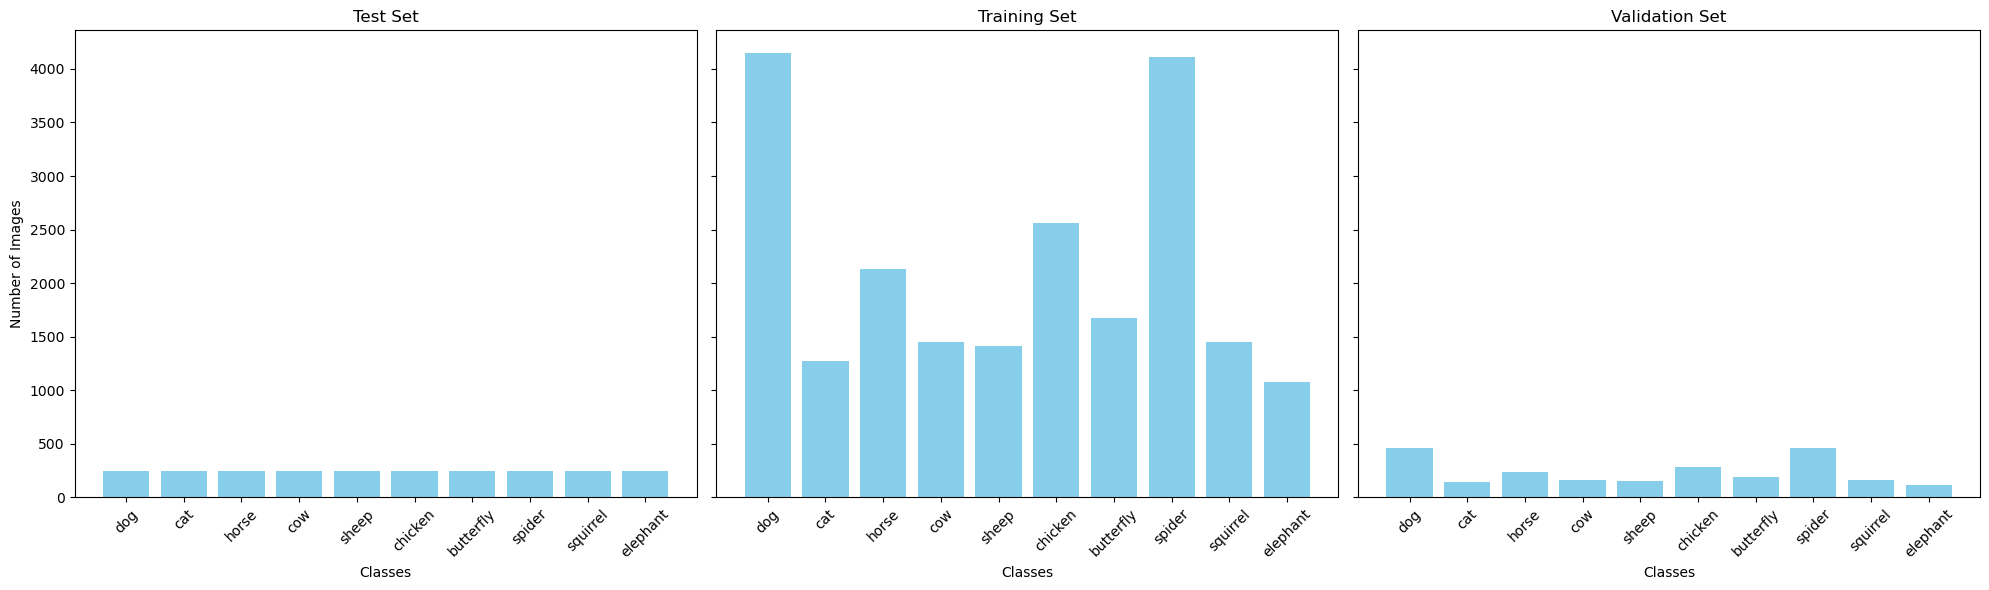

In [21]:
# Define the order of classes
class_order = ['dog', 'cat', 'horse', 'cow', 'sheep', 'chicken', 'butterfly', 'spider', 'squirrel', 'elephant']

# Plot the distribution of classes in the test, training, and validation sets
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot for the test set
axes[0].bar(test_class_counts.keys(), [test_class_counts.get(cls, 0) for cls in class_order], color='skyblue')
axes[0].set_title('Test Set')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of Images')
axes[0].set_xticklabels(class_order, rotation=45)

# Plot for the training set
axes[1].bar(train_class_counts.keys(), [train_class_counts.get(cls, 0) for cls in class_order], color='skyblue')
axes[1].set_title('Training Set')
axes[1].set_xlabel('Classes')
axes[1].set_xticklabels(class_order, rotation=45)

# Plot for the validation set
axes[2].bar(val_class_counts.keys(), [val_class_counts.get(cls, 0) for cls in class_order], color='skyblue')
axes[2].set_title('Validation Set')
axes[2].set_xlabel('Classes')
axes[2].set_xticklabels(class_order, rotation=45)

plt.tight_layout()
plt.show()

In [4]:
from PIL import Image
import os

filePath = 'archive/raw-img/'
dataPath = 'data/'

# Path to the elephant folder
elephant_folder = os.path.join(filePath, 'elefante')

# Create a folder to save the processed images
processed_folder = os.path.join(dataPath, 'Processed_Elephants')
os.makedirs(processed_folder, exist_ok=True)

# Process each image in the elephant folder
for img_name in os.listdir(elephant_folder):
    img_path = os.path.join(elephant_folder, img_name)
    with Image.open(img_path) as img:
        # Ensure the image has 3 color channels (RGB)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        # Save the processed image
        img = img.resize((128, 128))
        img.save(os.path.join(processed_folder, img_name))